**IMPORT COMMON AND NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


**IMPORT DATASET**

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Churn_Analysis.csv')

Saving Churn_Analysis.csv to Churn_Analysis (2).csv


**DISPLAYING THE DATASET**

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**PROVIDING INFORMATION ON DATASET**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**DATA PREPARATION**

In [ ]:
# Converting TotalCharges to numeric, forcinging errors to NaN to identify non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Removing rows with missing TotalCharges
df_cleaned = df.dropna(subset=['TotalCharges']).copy()

# Columns to handle
columns_with_no_service = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PhoneService', 'Partner', 'Dependents', 'PaperlessBilling', 'Churn'
]
multiple_phone_lines=["MultipleLines"]
internet_service=['InternetService']

# Replacing "No internet service" and "No phone service" with 2
for column in columns_with_no_service:
    df_cleaned[column] = df_cleaned[column].replace('No internet service', 2)
for column in multiple_phone_lines:
    df_cleaned[column] = df_cleaned[column].replace('No phone service', 2)

# Converting "Yes" and "No" to binary values
for column in columns_with_no_service:
    df_cleaned[column] = df_cleaned[column].replace({'Yes': 1, 'No': 0})
for column in multiple_phone_lines:
    df_cleaned[column] = df_cleaned[column].replace({'Yes': 1, 'No': 0})

#Assigning values to the column of internet_service
for column in internet_service:
    df_cleaned[column] = df_cleaned[column].replace({'No': 0, 'DSL': 1, 'Fiber optic':2 })


gender= ["gender"]
for column in gender:
    df_cleaned[column] = df_cleaned[column].replace({'Female': 1, 'Male': 0})



**LABEL ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Columns to perform label encoding has been stored in a list named columns_to_encode
columns_to_encode = [
    'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

label_encoder = LabelEncoder()

# Applying label encoding to each column
for column in columns_to_encode:
    df_cleaned[column + '_encoded_column'] = label_encoder.fit_transform(df_cleaned[column])

# Displaying the unique encoded values for each encoded column
for column in columns_to_encode:
    print(f"Unique values in {column}_encoded_column: {df_cleaned[column + '_encoded_column'].unique()}")

# Dropping the original categorical columns
df_cleaned.drop(columns=columns_to_encode, inplace=True, axis=1)




Unique values in MultipleLines_encoded_column: [2 0 1]
Unique values in InternetService_encoded_column: [1 2 0]
Unique values in OnlineSecurity_encoded_column: [0 1 2]
Unique values in OnlineBackup_encoded_column: [1 0 2]
Unique values in DeviceProtection_encoded_column: [0 1 2]
Unique values in TechSupport_encoded_column: [0 1 2]
Unique values in StreamingTV_encoded_column: [0 1 2]
Unique values in StreamingMovies_encoded_column: [0 1 2]
Unique values in Contract_encoded_column: [0 1 2]
Unique values in PaymentMethod_encoded_column: [2 3 0 1]


In [ ]:
encoded_columns = [
    'MultipleLines_encoded_column', 'InternetService_encoded_column',
    'OnlineSecurity_encoded_column', 'OnlineBackup_encoded_column',
    'DeviceProtection_encoded_column', 'TechSupport_encoded_column',
    'StreamingTV_encoded_column', 'StreamingMovies_encoded_column',
    'Contract_encoded_column', 'PaymentMethod_encoded_column'
]


for column in encoded_columns:
    print(f"Value counts for the {column} is:")
    print(df_cleaned[column].value_counts())
    print()


Value counts for the MultipleLines_encoded_column is:
MultipleLines_encoded_column
0    3385
1    2967
2     680
Name: count, dtype: int64

Value counts for the InternetService_encoded_column is:
InternetService_encoded_column
2    3096
1    2416
0    1520
Name: count, dtype: int64

Value counts for the OnlineSecurity_encoded_column is:
OnlineSecurity_encoded_column
0    3497
1    2015
2    1520
Name: count, dtype: int64

Value counts for the OnlineBackup_encoded_column is:
OnlineBackup_encoded_column
0    3087
1    2425
2    1520
Name: count, dtype: int64

Value counts for the DeviceProtection_encoded_column is:
DeviceProtection_encoded_column
0    3094
1    2418
2    1520
Name: count, dtype: int64

Value counts for the TechSupport_encoded_column is:
TechSupport_encoded_column
0    3472
1    2040
2    1520
Name: count, dtype: int64

Value counts for the StreamingTV_encoded_column is:
StreamingTV_encoded_column
0    2809
1    2703
2    1520
Name: count, dtype: int64

Value counts for t

**FEATURE SELECTION**

In [ ]:
#Dropping the column of customer ID as it does not provide much relevance in determining the churn
df_cleaned.drop(columns=['customerID'], inplace=True)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
X = df_cleaned.drop(columns=['Churn'])
y = df_cleaned['Churn']  # Target variable for churn prediction

fe_sel= SelectKBest(score_func=f_classif, k=5) # I haved used SelectKBest method for feature selection which will select the top k=5 features according to the scoring function
                                               # f_classif is the scoring function i.e. ANNOVA F-value between feature for classification tasks
X_selected = fe_sel.fit_transform(X, y)

selected_features = X.columns[fe_sel.get_support()]

df_selected = pd.DataFrame(data=X_selected, columns=selected_features)

print("Selected features:", selected_features.tolist())    # Displaying a list of selected features

print("Feature scores:", fe_sel.scores_) # Displaying the feature scores


Selected features: ['tenure', 'InternetService_encoded_column', 'OnlineSecurity_encoded_column', 'TechSupport_encoded_column', 'Contract_encoded_column']
Feature scores: [5.13304300e-01 1.63012426e+02 1.61775966e+02 1.92188857e+02
 1.00750943e+03 9.61053682e-01 2.67487636e+02 2.71576990e+02
 2.91344862e+02 2.70420240e+00 7.81782713e+02 8.73480985e+02
 6.50614186e+02 6.02910018e+02 8.56055471e+02 3.09168346e+02
 3.15191138e+02 1.30861616e+03 8.27357488e+01]


**PERFORMING SMOTEENN ( Synthetic Minority Oversampling Technique Edited Nearest Neighbors ) TO HANDLE IMBALANCED DATASETS**

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [ ]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
X_resampled_df = pd.DataFrame(X_resampled, columns=selected_features)
X_resampled_df.head()


,tenure,InternetService_encoded_column,OnlineSecurity_encoded_column,TechSupport_encoded_column,Contract_encoded_column
0,34,1,1,0,1
1,45,1,1,1,1
2,62,1,1,0,1
3,25,2,1,1,0
4,69,2,1,1,2


In [ ]:
y_resampled.value_counts()

Churn
1    3168
0    2671
Name: count, dtype: int64

**TRAIN-TEST-SPLIT**

In [ ]:
x_train_resampled, x_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled_df, y_resampled, test_size=0.2, random_state=42)

**MODEL SELECTION AND TRAINING**

DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_clf = DecisionTreeClassifier(criterion='gini', random_state=200, max_depth=50, min_samples_split=6, min_samples_leaf=1, max_features=None, splitter='best')

dt_clf.fit(x_train_resampled, y_train_resampled)

y_pred = dt_clf.predict(x_test_resampled)



LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_clf = LogisticRegression(random_state=150, max_iter=1000, C=1.0, penalty='l2', solver='liblinear', class_weight=None, multi_class='auto', n_jobs=None)

lr_clf.fit(x_train_resampled, y_train_resampled)

y_pred = lr_clf.predict(x_test_resampled)


RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features='auto', random_state=150, n_jobs=-1)

rf_clf.fit(x_train_resampled, y_train_resampled)

y_pred = rf_clf.predict(x_test_resampled)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GRADIENT BOOSTING CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=150)

gb_clf.fit(x_train_resampled, y_train_resampled)

y_pred = gb_clf.predict(x_test_resampled)



**MODEL EVALUATION**

DECISION TREE CLASSIFIER

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       572
           1       0.91      0.94      0.93       596

    accuracy                           0.92      1168
   macro avg       0.92      0.92      0.92      1168
weighted avg       0.92      0.92      0.92      1168



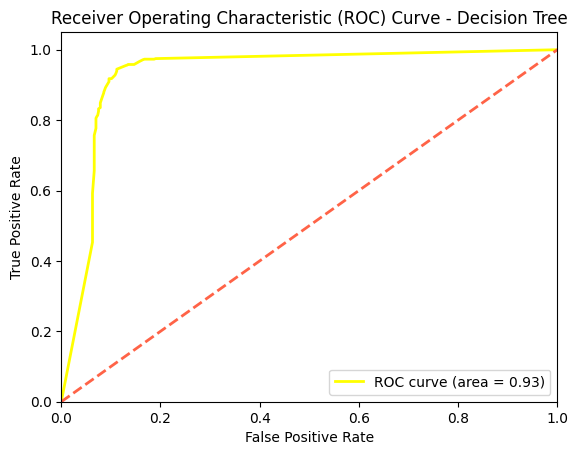

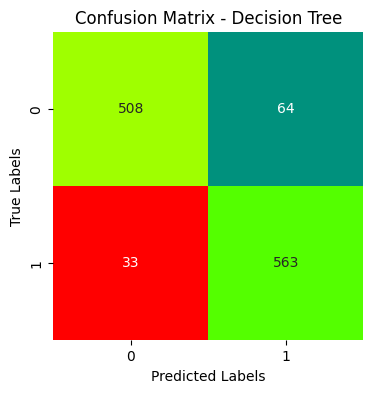

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_proba_dt = dt_clf.predict_proba(x_test_resampled)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test_resampled, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

accuracy = accuracy_score(y_test_resampled, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_resampled, y_pred))

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='yellow', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='tomato', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

print("\n")

y_pred_dt = dt_clf.predict(x_test_resampled)
cm_dt_ = confusion_matrix(y_test_resampled, y_pred_dt)

plt.figure(figsize=(4,4))
sns.heatmap(cm_dt_, annot=True, fmt='d', cmap='prism', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


LOGISTIC REGRESSION

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       572
           1       0.91      0.94      0.93       596

    accuracy                           0.92      1168
   macro avg       0.92      0.92      0.92      1168
weighted avg       0.92      0.92      0.92      1168



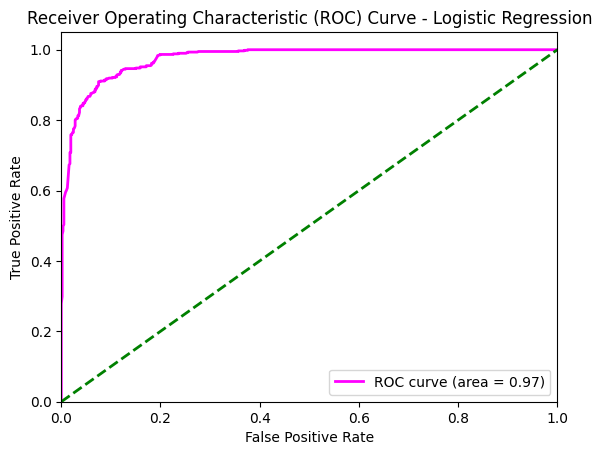

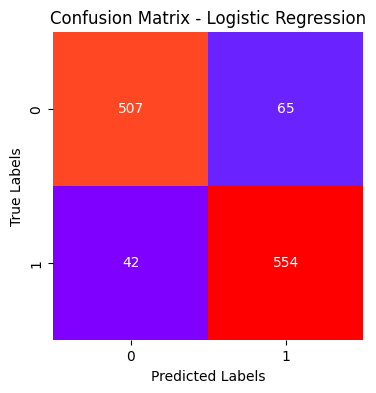

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_proba_lr = lr_clf.predict_proba(x_test_resampled)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test_resampled, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

accuracy = accuracy_score(y_test_resampled, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_resampled, y_pred))

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='fuchsia', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

print("\n")

y_pred_lr = lr_clf.predict(x_test_resampled)
cm_lr_ = confusion_matrix(y_test_resampled, y_pred_lr)

plt.figure(figsize=(4, 4))
sns.heatmap(cm_lr_, annot=True, fmt='d', cmap='rainbow', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


RANDOM FOREST CLASSIFIER

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       572
           1       0.91      0.94      0.93       596

    accuracy                           0.92      1168
   macro avg       0.92      0.92      0.92      1168
weighted avg       0.92      0.92      0.92      1168



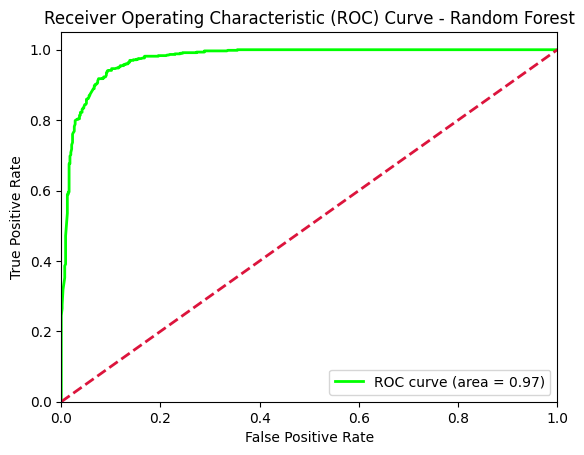

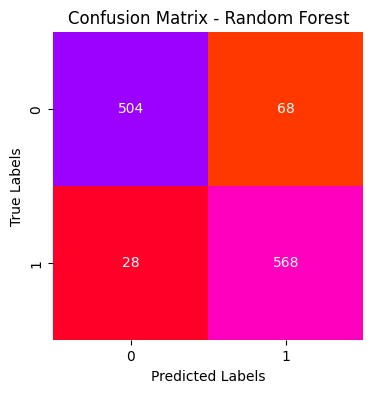

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_proba_rf = rf_clf.predict_proba(x_test_resampled)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test_resampled, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

accuracy = accuracy_score(y_test_resampled, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_resampled, y_pred))

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='lime', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='crimson', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

print("\n")

y_pred_rf = rf_clf.predict(x_test_resampled)
rf_cm_ = confusion_matrix(y_test_resampled, y_pred_rf)

plt.figure(figsize=(4,4))
sns.heatmap(rf_cm_, annot=True, fmt='d', cmap='gist_rainbow', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


GRADIENT BOOSTING CLASSIFIER

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       572
           1       0.91      0.94      0.93       596

    accuracy                           0.92      1168
   macro avg       0.92      0.92      0.92      1168
weighted avg       0.92      0.92      0.92      1168



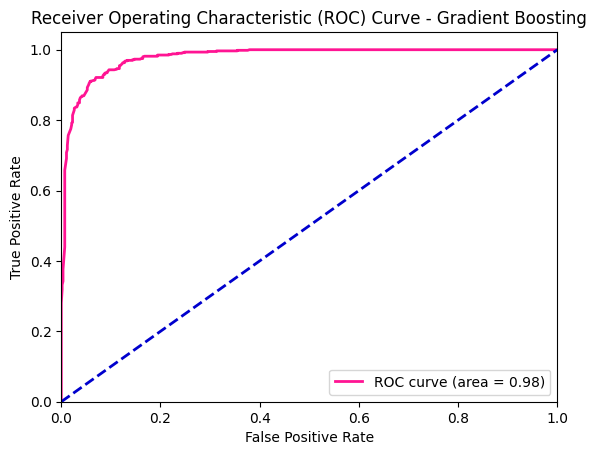

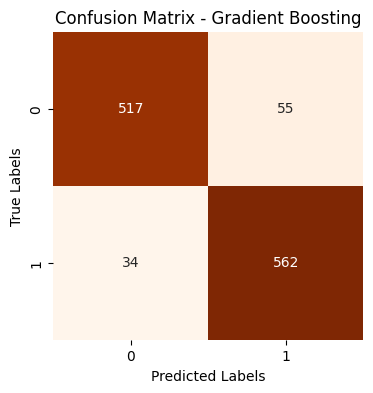

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_proba_gb = gb_clf.predict_proba(x_test_resampled)[:, 1]

fpr_gb, tpr_gb, _ = roc_curve(y_test_resampled, y_pred_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

accuracy = accuracy_score(y_test_resampled, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_resampled, y_pred))

plt.figure()
plt.plot(fpr_gb, tpr_gb, color='deeppink', lw=2, label=f'ROC curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='mediumblue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

print("\n")
y_pred_gr_boost = gb_clf.predict(x_test_resampled)
cm_gr_boost_ = confusion_matrix(y_test_resampled, y_pred_gr_boost)

plt.figure(figsize=(4,4))
sns.heatmap(cm_gr_boost_, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
